# 2023 - 01 -30

# stack overflow Annual Deverope Survey

https://insights.stackoverflow.com/survey

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
survey_raw_df = pd.read_csv('data\survey_results_public.csv', index_col="ResponseId")

> schema_raw["survey_raw_df의 column"]을 조회하면 그 column에 대한 question 대한 값이 조회되도록 만들기  

In [4]:
schema_raw = pd.read_csv('data\survey_results_schema.csv', index_col="qname")["question"]

> 데이터 확인하기  

In [5]:
survey_raw_df.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [6]:
schema_raw.index

Index(['S0', 'MetaInfo', 'S1', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'S2', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'S3', 'Language', 'Database', 'Platform',
       'Webframe', 'MiscTech', 'ToolsTech', 'NEWCollabTools', 'OpSys',
       'VersionControlSystem', 'VCInteraction', 'VCHosting',
       'OfficeStackAsync', 'OfficeStackSync', 'Blockchain', 'S4', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'S5', 'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'S6', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge',
       'Frequency', 'TimeSearching', 'TimeAnswering', 'Onboarding',
       'ProfessionalTech', 'SOTeamsUsage', 'TrueFalse', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowl

> 데이터 칼럼 중 CompTotal이란 항목에 대한 질문이 궁금하다면 schema_raw 시리즈 데이터를 통해 조회하기  

In [7]:
schema_raw["CompTotal"]

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [8]:
schema_raw["CompFreq"]

'Is that compensation weekly, monthly, or yearly?'

> survey_raw_df에 대한 info()를 조회해보면 78개의 column이 존재하는거 확인 가능  
많은 column이 존재하면 pandas에서 가시성을 위해 출력시 column 일부를 생략  

In [9]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

survey_raw_df에 대해 조회할 때 생략되는 column이 없도록 아래와 같이 설정을 해줌   
- display.max_columns : 표현되는 column의 최대 개수  
- display.max_rows : 표현되는 row의 최대 개수  

In [10]:
# 표현되는 column과 row의 범위 변경  
pd.set_option("display.max_columns", 78)
pd.set_option("display.max_rows", 78)

매우 많은 column이 존재하는데, 이 중 우리는 일부를 발췌하여 사용하기  
- 인구 통계(성별, 나이, 학력 등)  
- 프로그래밍 기술, 경험 및 선호도  
- 고용 관련 정보, 선호도 및 의견  

In [11]:
selected_columns = [
    # 인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    # 프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    # 고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]

위에서 만든 리스트를 활용하여 column에 대한 배열 인덱싱을 하고 있음  
결과를 survey_raw_df로부터 분리하여 작업하고자 copy() 메서드를 통해 새롭게 복사  

In [12]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [13]:
print(schema_raw["YearsCode"])

Including any education, how many years have you been coding in total?


# 연습문제 1
해당 column이 NaN 값을 얼마나 갖는지 확인하기 위한 함수 만들기  
- Series를 인자로 갖는 count_nan 함수를 만들기  
- 이 함수는 인자로 전달된 series의 NaN 개수를 반환  

In [14]:
def count_nan(series):
    return series.isnull().sum()

In [15]:
count_nan(survey_df)

Country                    1497
Age                        2322
Gender                     2415
EdLevel                    1697
YearsCode                  1937
YearsCodePro              21435
LanguageHaveWorkedWith     2293
LanguageWantToWorkWith     6241
LearnCodeCoursesCert      43879
ProfessionalTech          38362
SOAccount                  1696
Employment                 1559
DevType                   11966
WorkExp                   36499
dtype: int64

In [16]:
def count_nan_2(series):
    return len(series) - series.count()

In [17]:
count_nan_2(survey_df) # 함수 호출하기

Country                    1497
Age                        2322
Gender                     2415
EdLevel                    1697
YearsCode                  1937
YearsCodePro              21435
LanguageHaveWorkedWith     2293
LanguageWantToWorkWith     6241
LearnCodeCoursesCert      43879
ProfessionalTech          38362
SOAccount                  1696
Employment                 1559
DevType                   11966
WorkExp                   36499
dtype: int64

# 연습문제 2
YearsCode의 'Less than 1 year'의 값은 0으로 변경하고 'More than 50 years'의 값은 51로 일괄적으로 변경하기  
또 dtype을 float로 변경하고 이를 survey_df["YearsCode"]에 적용해보기  
  
- 아래의 Series의 메서드를 활용하기  
- 힌트 : replac(변경 전 값, 변경 후 값, inplace=True)

In [18]:
survey_df["YearsCode"].replace(['Less than 1 year', 'More than 50 years'], [0, 51], inplace=True) #값 변경하기 
survey_df["YearsCode"] = survey_df["YearsCode"].astype(float) 
survey_df["YearsCode"]

ResponseId
1         NaN
2         NaN
3        14.0
4        20.0
5         8.0
         ... 
73264     8.0
73265     6.0
73266    42.0
73267    50.0
73268    16.0
Name: YearsCode, Length: 73268, dtype: float64

YearsCode와 비슷한 YearsCodePro에 대해 살펴보자  
이 column은 교육 기간을 포함하지 않는다는 차이점만 찾는 것을 확인가능  
YearsCode보다 결측치가 많음  

In [19]:
print(schema_raw["YearsCodePro"])

NOT including education, how many years have you coded professionally (as a part of your work)?


# 연습문제  
YearsCodepro의 'Less than 1 year'의 값은 0으로 변경하고 'More than 50 years'의 값은 51로 일괄적으로 변경하기
또 dtype을 float로 변경하고 이를 survey_df["YearsCode"]에 적용해보기

In [20]:
survey_df["YearsCodePro"].replace(['Less than 1 year', 'More than 50 years'], [0, 51], inplace=True) #값 변경하기 
survey_df["YearsCodePro"] = survey_df["YearsCodePro"].astype(float) 
survey_df["YearsCodePro"]

ResponseId
1         NaN
2         NaN
3         5.0
4        17.0
5         3.0
         ... 
73264     5.0
73265     5.0
73266    33.0
73267    31.0
73268     5.0
Name: YearsCodePro, Length: 73268, dtype: float64

Survey  
이제 YearsCode, YearsC odePro, WorKEXp라는 column들에 대한 통계 요약을 확인 가능  
surey_df. describel()를 통해 값의 분포를 확인  
범위마다 표현되는 값이 정수이다 보니 데이터 값이 정수 값을 갖는 것을 짐작가능

In [21]:
survey_df.describe()

,YearsCode,YearsCodePro,WorkExp
count,71331.000000,51833.000000,36769.000000
mean,12.251307,9.910270,10.242378
std,9.952419,8.712048,8.706850
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,9.000000,7.000000,8.000000
75%,16.000000,14.000000,15.000000
max,51.000000,51.000000,50.000000


만약 YearsCode, YearsCodePro 에 대한 값 중 "Less than 1 year", "More than 50 years"의 값을 NaN으로 처리하면서 수치 자료형으로 바꾼다면 to_numeric()메서드 사용 가능  

In [22]:
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors = 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors = 'coerce')

Gender, 성별에 대한 column이다  
여러가지 옵션을 선택할 수 있도록 되어있는 항목  
그 값들의 유니크한 목록을 뽑아보면 예상 외로 다양한 값이 존재 가능  
여기서는 둘 이상의 옵션이 포함된 값을 배제하고 데이터 다루기  

In [23]:
schema_raw["Gender"]

'Which of the following describe you, if any? Please check all that apply.'

In [24]:
survey_df["Gender"].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

## contains()

np.nan 값이 섞인 Series 자료형에 대해 특정 문자 값이 포함되었는지 사용할 수 있는 메서드로 contains()가 있다  
첫 인자로 포함된 것을 찾을 문자열을 넣어준다   
na 키워드 인수를 활용하면 NaN값을 대신할 값 삽입 가능  

앞의 두 메서드를 활용하면 ';'를 포함하는 row를 NaN 값으로 변경 가능  
'~'은 비트 연산자로 Series 자료형의 벡터화 연산을 위해 True를 False로 False는 True로 반전해주는 역할  

```python
DataFrame.where(cond, other=_NoDeFault.no_default, *, inplace=False, axis=None,
               errors='raise', try_cast = _NoDeFault.no_default)
```

In [25]:
survey_df["Gender"].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

In [26]:
survey_df.where(~(survey_df["Gender"].str.contains(";", na=False)), np.nan, inplace=True)
# where : 특정 열을 변경
# where은 False값을 가질떄 (';'을 가지고 있을 때) 만 대체 가능하기 떄문에 cond값의 True 값을 False값으로 변경해야함 

변환 후 성별로 1개의 값만 선택한 선택지만 남은 것을 확인 가능

In [27]:
survey_df["Gender"].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

## 데이터 시각화 하기  
%matplotlib inline 매직 명령어를 통해서 주피터 내의 그래프가 잘 출력 되도록 설정하기  

In [28]:
%matplotlib inline

sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (9, 5)
mpl.rcParams['figure.facecolor'] = '#00000000'

#### set_style()메서드를 통해 그림의 스타일 일괄 적용하기    
rcParams 값도 필요에 따라 지정
- font.size : 기본 폰트의 크기 적용  
- figure.figsize : 기본 figure의 사이즈를 적용  
- figure.facecolor : 기본 figure 내 배경 색상을 흰색(#000000)으로 적용

In [29]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)

Nanum JungHagSaeng
Hi Melody


In [30]:
# Set font family globally
mpl.rcParams['font.family'] = 'Hi Melody'
print(mpl.rcParams['font.family'])

['Hi Melody']


### 폰트에 대한 적용하기  
기본 폰트 적용은 rcparams 설정으로 가능  
- font.family : 기본 폰트 종류 적용  
- axes.unicode_minus:False로 설정 시 마이너스 기호를 ASCII로 함 

In [31]:
mpl.rcParams['font.family'] = 'Hi Melody'
mpl.rcParams['axes.unicode_minus'] = False

country 컬럼에 대한 정보를 확인하기  

In [32]:
schema_raw['Country']

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [33]:
survey_df["Country"].unique()

array([nan, 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'United States of America', 'Germany', 'India', 'Netherlands',
       'Croatia', 'Australia', 'Russian Federation', 'Czech Republic',
       'Austria', 'Serbia', 'Italy', 'Ireland', 'Poland', 'Slovenia',
       'Iraq', 'Sweden', 'Madagascar', 'Norway', 'Taiwan',
       'Hong Kong (S.A.R.)', 'Mexico', 'France', 'Brazil', 'Lithuania',
       'Uruguay', 'Denmark', 'Spain', 'Egypt', 'Turkey', 'South Africa',
       'Ukraine', 'Finland', 'Romania', 'Portugal', 'Singapore', 'Oman',
       'Belgium', 'Chile', 'Bulgaria', 'Latvia', 'Philippines', 'Greece',
       'Belarus', 'Saudi Arabia', 'Kenya', 'Switzerland', 'Iceland',
       'Viet Nam', 'Thailand', 'China', 'Montenegro', 'Slovakia', 'Japan',
       'Luxembourg', 'Turkmenistan', 'Argentina', 'Hungary', 'Tunisia',
       'Bangladesh', 'Maldives', 'Dominican Republic', 'Jordan',
       'Pakistan', 'Nepal', 'Iran, Islamic Republic of...', 'I

### Country에 대한 유일한 값의 개수 확인하기  
NaN값은 count에 포함 X

In [34]:
# .unique 앞에 n 추가 하면 개수 구해줌 
survey_df["Country"].nunique()

180

# 연습문제  
설문 응답자가 속한 국가 중 응답자 수 상위 15개 국가를 아래와 같이 구하기

In [35]:
country = survey_df["Country"].value_counts().head(15) 


# 연습문제 2  
  
1번 값을 가지고 차트 작성하기    
- xticks의 글자를 회전시키려면 rotation 키워드 인수에 각도를 의미하는 정수 값 입력하기  

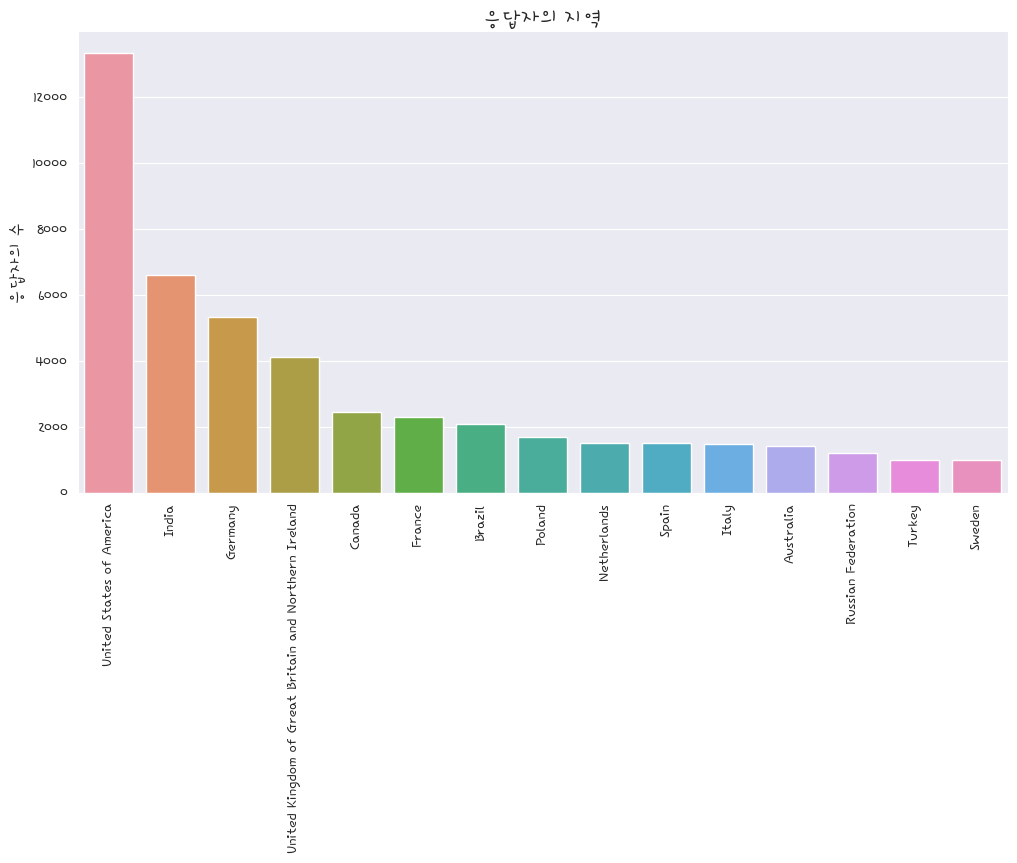

In [36]:
plt.figure(figsize=(12, 6)) # figure 사이즈를 12 X 6으로 설정
plt.title("응답자의 지역")
sns.barplot(x = country.index, y = country )
plt.xticks(rotation=90) # 90도로 회전시키기
plt.ylabel("응답자의 수")
plt.show()

Stack Overflow Annual Deverope Survey 가 영어로 진행되고, 또 이들 국가의 영어 사용 인구가 가장 많기 떄문에 응답자의 인구가 미국과 인도가 불균형으로 높음   
비영어권 국가의 프로그래머 응답자 수가 부족 

In [37]:
count_nan(survey_df['Age'])

3011

### 연령 데이터 확인하기  

In [38]:
age_counts = survey_df['Age'].value_counts()
age_counts 

25-34 years old       27878
18-24 years old       16455
35-44 years old       13866
45-54 years old        5250
Under 18 years old     3775
55-64 years old        1974
65 years or older       547
Prefer not to say       512
Name: Age, dtype: int64

8개의 범주로 나뉘고 있음을 확인  

In [39]:
survey_df['Age'].nunique()

8

# 연습 문제  
연령의 분포가 한눈에 들어오도록 아래와 같이 그래프를 출력하기  
x축의 출력하는 데이터의 순서도 고려하여 작성하기  

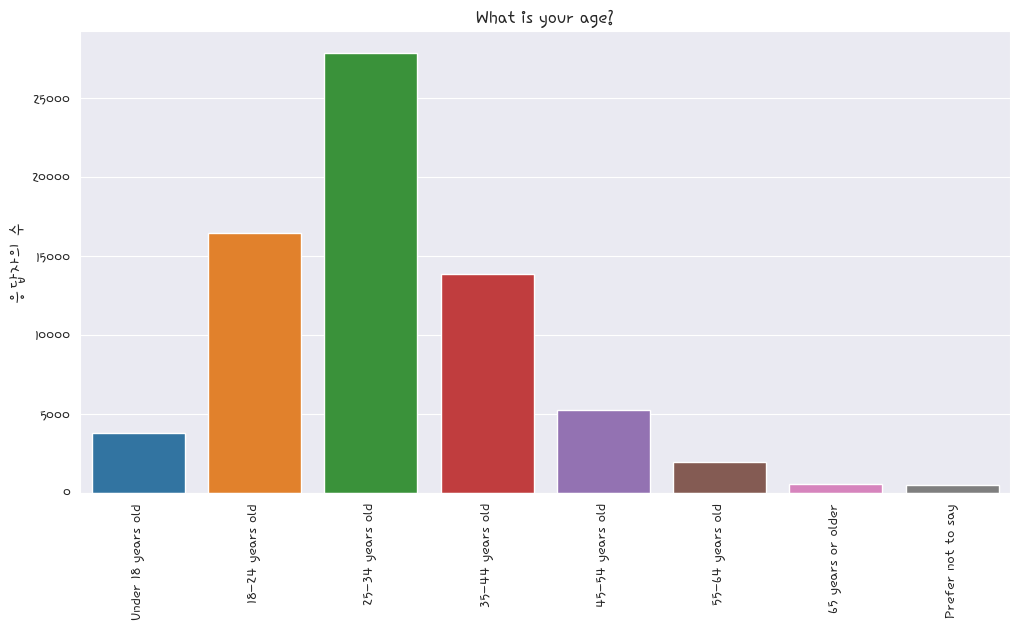

In [40]:
plt.figure(figsize=(12, 6)) # figure 사이즈를 12 X 6으로 설정
plt.title("What is your age?")
sns.barplot(x = age_counts.index, y = age_counts , order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say'])
plt.xticks(rotation=90) # 90도로 회전시키기
plt.ylabel("응답자의 수")
plt.show()

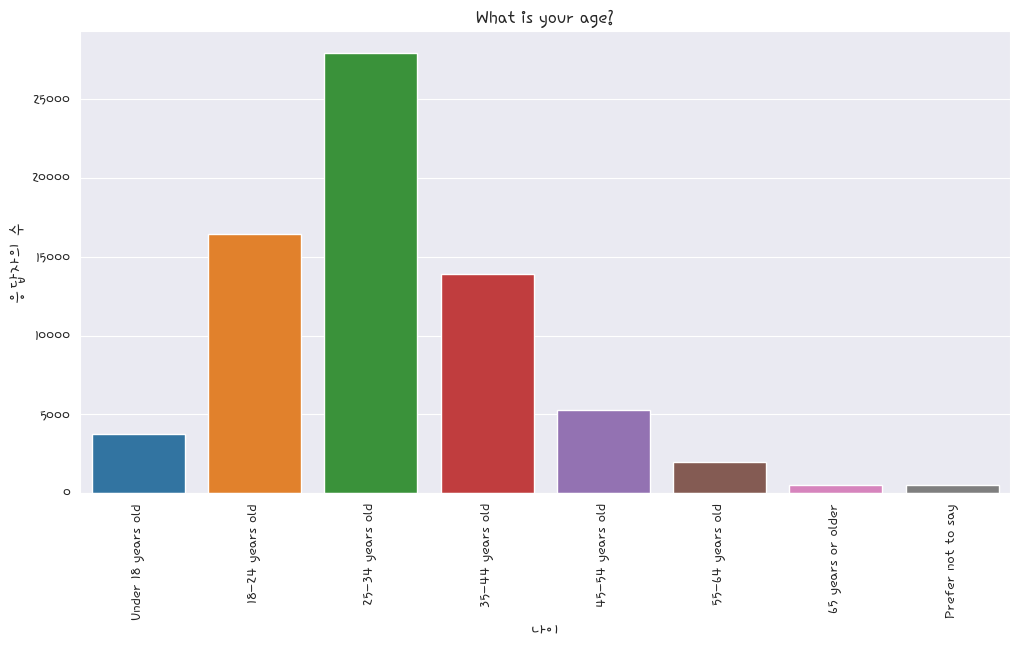

In [41]:
plt.figure(figsize=(12, 6)) # figure 사이즈를 12 X 6으로 설정
plt.title(schema_raw["Age"])
sns.countplot(data=survey_df, x='Age', order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say'])
plt.xticks(rotation=90) # 90도로 회전시키기
plt.xlabel("나이")
plt.ylabel("응답자의 수")
plt.show()

# 연습문제 3

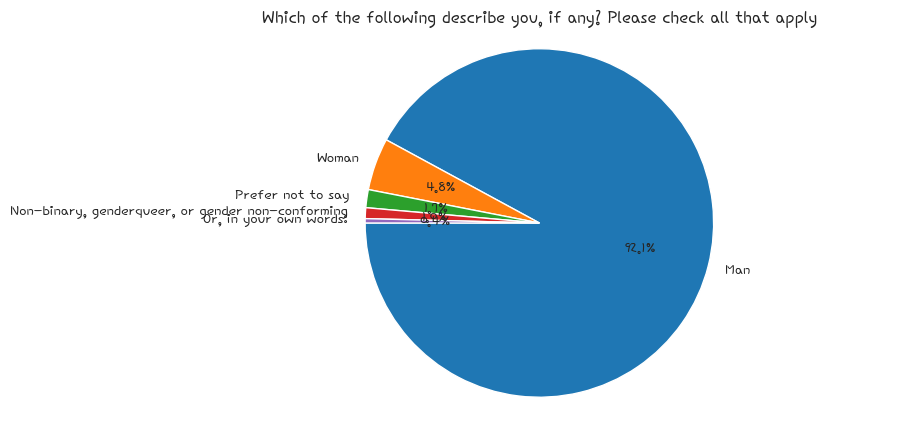

In [42]:
import matplotlib.pyplot as plt
labels = survey_df["Gender"].value_counts().index
sizes = survey_df["Gender"].value_counts().values
plt.title("Which of the following describe you, if any? Please check all that apply")
plt.pie(sizes, labels=labels, 
       autopct='%1.1f%%', startangle=180)
plt.axis('equal') #원의 형태를 유지
plt.show()

In [43]:
 survey_df["Gender"].value_counts().values

array([64607,  3399,  1172,   704,   279], dtype=int64)

In [44]:
 survey_df["Gender"].value_counts().index

Index(['Man', 'Woman', 'Prefer not to say',
       'Non-binary, genderqueer, or gender non-conforming',
       'Or, in your own words:'],
      dtype='object')

#### 응답자의 교육 수준에 대한 설문도 존재하기에 그에 대한 내용을 확인하기  

In [55]:
schema_raw["EdLevel"]

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [48]:
survey_df["EdLevel"].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30050
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15394
Some college/university study without earning a degree                                 9194
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7769
Associate degree (A.A., A.S., etc.)                                                    2221
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2152
Primary/elementary school                                                              1767
Something else                                                                         1222
Professional degree (JD, MD, etc.)                                                     1110
Name: EdLevel, dtype: int64

# 연습문제 3  
아래 보이는 그래프를 출력하는 코드를 구현하기 

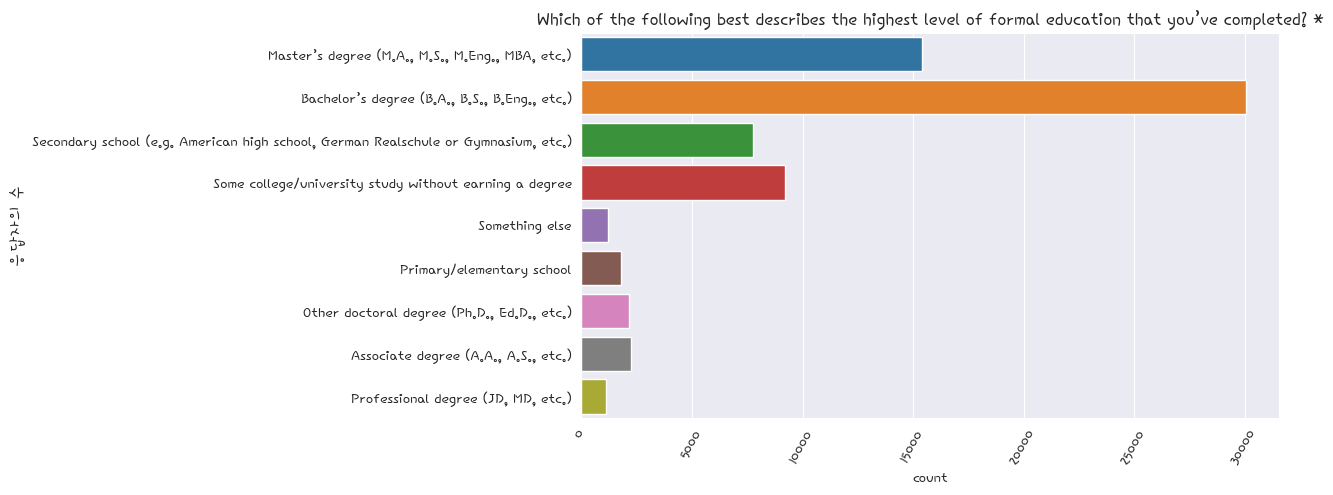

In [49]:
plt.title(schema_raw["EdLevel"])
plt.xticks(rotation=60)
sns.countplot(data=survey_df, y='EdLevel')
plt.ylabel("응답자의 수")
plt.show()

# 연습문제 4

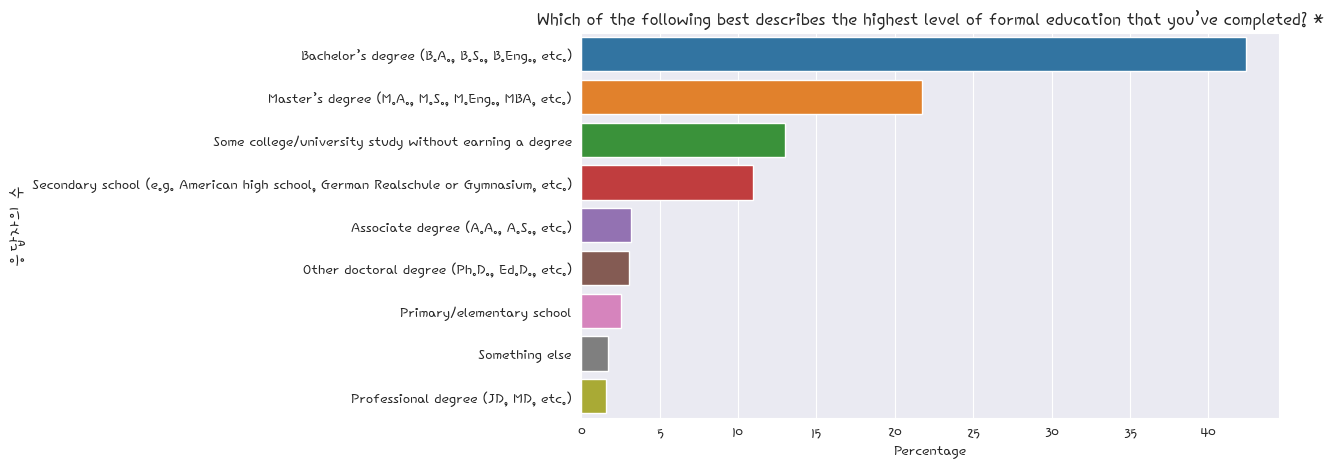

In [50]:
plt.title(schema_raw["EdLevel"])
sns.barplot(y = survey_df["EdLevel"].value_counts().index, x = survey_df["EdLevel"].value_counts(normalize=True)* 100) 
plt.xlabel("Percentage")                                                                      # (normalize=True) --> (True)로 normalize 생략 가능 
plt.ylabel("응답자의 수")
plt.show()

In [52]:
 survey_df["Employment"].value_counts().head(15)

Employed, full-time                                                         42644
Student, full-time                                                           6663
Independent contractor, freelancer, or self-employed                         4941
Employed, full-time;Independent contractor, freelancer, or self-employed     3456
Not employed, but looking for work                                           1810
Student, full-time;Employed, part-time                                       1148
Employed, part-time                                                          1116
Student, part-time                                                           1036
Employed, full-time;Student, full-time                                        961
Employed, full-time;Student, part-time                                        932
Student, part-time;Employed, part-time                                        717
Student, full-time;Not employed, but looking for work                         715
Not employed, an

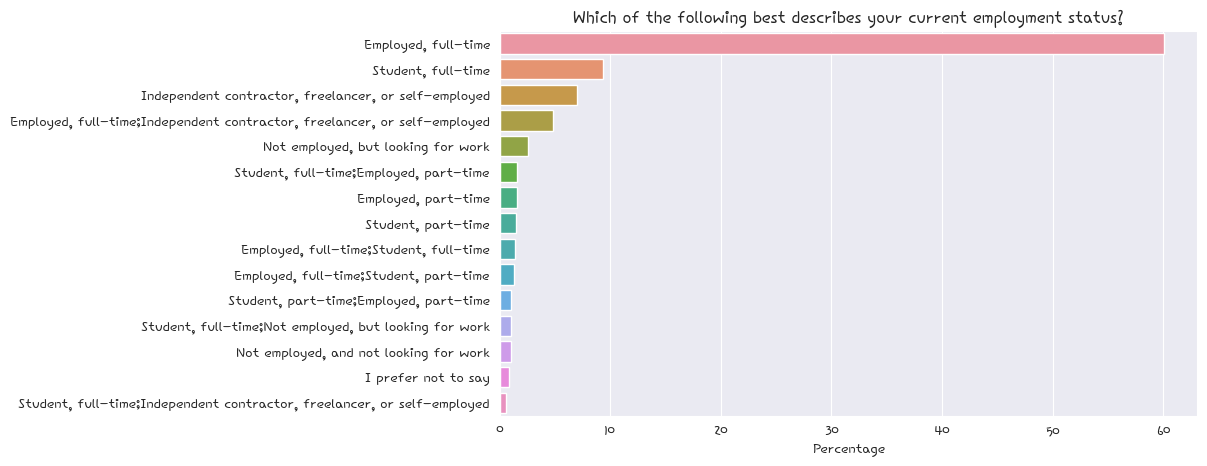

In [53]:
Employment_high = survey_df["Employment"].value_counts(normalize=True).head(15)
plt.title(schema_raw["Employment"])
sns.barplot(x = Employment_high * 100, y = Employment_high.index )
plt.xlabel("Percentage")
plt.show()

## Devtype  
약 10,000개의 가지수가 있는 것으로 조회할때 데이터 처리 방법  

In [54]:
survey_df.value_counts() 

Country      Age              Gender  EdLevel                                                 YearsCode  YearsCodePro  LanguageHaveWorkedWith                                       LanguageWantToWorkWith                                LearnCodeCoursesCert        ProfessionalTech                                                                                                                                                                                      SOAccount  Employment                                                                DevType                                                                                                                              WorkExp
Afghanistan  18-24 years old  Man     Bachelor’s degree (B.A., B.S., B.Eng., etc.)            3.0        1.0           HTML/CSS;JavaScript                                          Go;HTML/CSS;JavaScript;TypeScript                     Coursera;Udemy              None of these                                       

# 연습문제 5

DevType column을 제일 작은 단위의 응답 항목으로 나누어 DataFrame 형태로 만들기  
- Series를 인자로 받기  
- value의 구분자는 ';'  
- Series는 item()메서드를 사용하여 루프가능 ( for i v in Series items())
- 반환 값으로 각 제일 작은 단위의 응답 항목을 column으로 갖는 DataFrame을 준다  
- 응답자가 제일 작은 단위의 기술 스텍을 선택한 경우 해당 열의 값을 True로 아닌 경우 False

In [89]:
def split_multicolumn(col_series):
    # 반환할 DataFrame이자 최초의 col_series도 담는다.
    result_df = pd.DataFrame(col_series.values, index=col_series.index, columns=["DevType"])
    # result_df = col_series.to_frame() --> 위의 코드와 같다.
    # 기술 스텍 목록을 담았다가 마지막 반환할 때 인덱싱으로 활용
    
    options = []
    # NaN 값을 갖는 row를 제외하고 반복
    for idx, value  in col_series[col_series.notnull()].items():
        # value를 가져와 ';'를 기준으로 분리하여 각 기술 스텍 문자열 리스트를 만든다.
        for option in value.split(';'):
            # 현재 option이 result_df.columns에 없으면 추가한다.
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            # 파싱한 기술 스텍에 해당하는 column의 값에 True를 넣는다.
            result_df.at[idx, option] = True
            # result_df.loc[idx, option] = True
    return result_df[options]

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html

split_multicolumn(survey_df.DevType)

,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",Educator,Engineering manager,Database administrator,Academic researcher,DevOps specialist,Other (please specify):,"Developer, embedded applications or devices","Developer, game or graphics",Project manager,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [90]:
def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df
dev_type_df = split_multicolumn(survey_df['DevType'])
dev_type_df

,Data scientist or machine learning specialist,"Developer, full-stack","Developer, front-end","Developer, back-end","Developer, desktop or enterprise applications",Engineering manager,"Engineer, data",Student,Other (please specify):,"Engineer, site reliability","Developer, mobile",Marketing or sales professional,"Developer, embedded applications or devices",DevOps specialist,Designer,Database administrator,System administrator,"Developer, QA or test",Product manager,Project manager,Data or business analyst,"Senior Executive (C-Suite, VP, etc.)",Security professional,Educator,Academic researcher,"Developer, game or graphics",Cloud infrastructure engineer,Scientist,Blockchain
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [93]:
temp = []
for _, value in survey_df["DevType"].dropna().items():
    temp.extend(value.split(';'))
temp

['Data scientist or machine learning specialist',
 'Developer, front-end',
 'Engineer, data',
 'Engineer, site reliability',
 'Developer, full-stack',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, QA or test',
 'Developer, full-stack',
 'Student',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, mobile',
 'Educator',
 'Developer, full-stack',
 'Developer, back-end',
 'Engineering manager',
 'Developer, full-stack',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, back-end',
 'Database administrator',
 'Developer, full-stack',
 'Academic researcher',
 'DevOps specialist',
 'Developer, full-stack',
 'Developer, full-stack',
 'Engineer, data',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Student',
 'Developer, full-stack',
 'Developer, back-end',
 'Other (please specify):',
 'Developer, full-stack',
 'Developer, bac

In [94]:
result = list(set(temp))
result

['Developer, embedded applications or devices',
 'Developer, game or graphics',
 'Project manager',
 'System administrator',
 'Developer, mobile',
 'Cloud infrastructure engineer',
 'Marketing or sales professional',
 'Developer, front-end',
 'Database administrator',
 'Educator',
 'Developer, QA or test',
 'Engineering manager',
 'Blockchain',
 'Senior Executive (C-Suite, VP, etc.)',
 'Engineer, data',
 'Data scientist or machine learning specialist',
 'Academic researcher',
 'Developer, desktop or enterprise applications',
 'Developer, full-stack',
 'Product manager',
 'Designer',
 'Scientist',
 'Student',
 'Data or business analyst',
 'Other (please specify):',
 'Security professional',
 'DevOps specialist',
 'Developer, back-end',
 'Engineer, site reliability']

In [104]:
dev_type_df.sum().sort_values(ascending=False)

Developer, full-stack                            28433
Developer, back-end                              26369
Developer, front-end                             15739
Developer, desktop or enterprise applications     9451
Developer, mobile                                 7566
DevOps specialist                                 6093
Student                                           5503
Cloud infrastructure engineer                     5215
Database administrator                            4872
System administrator                              4828
Developer, embedded applications or devices       3871
Project manager                                   3844
Designer                                          3712
Engineer, data                                    3558
Engineering manager                               3534
Data scientist or machine learning specialist     3377
Data or business analyst                          3166
Developer, QA or test                             3045
Academic r

In [182]:
devtype_percentage = round(dev_type_df.sum().sort_values(ascending=False) / dev_type_df.sum().sum() * 100, 10)
devtype_percentage

Developer, full-stack                            17.462842
Developer, back-end                              16.195185
Developer, front-end                              9.666503
Developer, desktop or enterprise applications     5.804569
Developer, mobile                                 4.646849
DevOps specialist                                 3.742169
Student                                           3.379806
Cloud infrastructure engineer                     3.202923
Database administrator                            2.992261
System administrator                              2.965238
Developer, embedded applications or devices       2.377472
Project manager                                   2.360889
Designer                                          2.279818
Engineer, data                                    2.185235
Engineering manager                               2.170495
Data scientist or machine learning specialist     2.074070
Data or business analyst                          1.9444

In [183]:
devtype_percentage.sum()

100.0

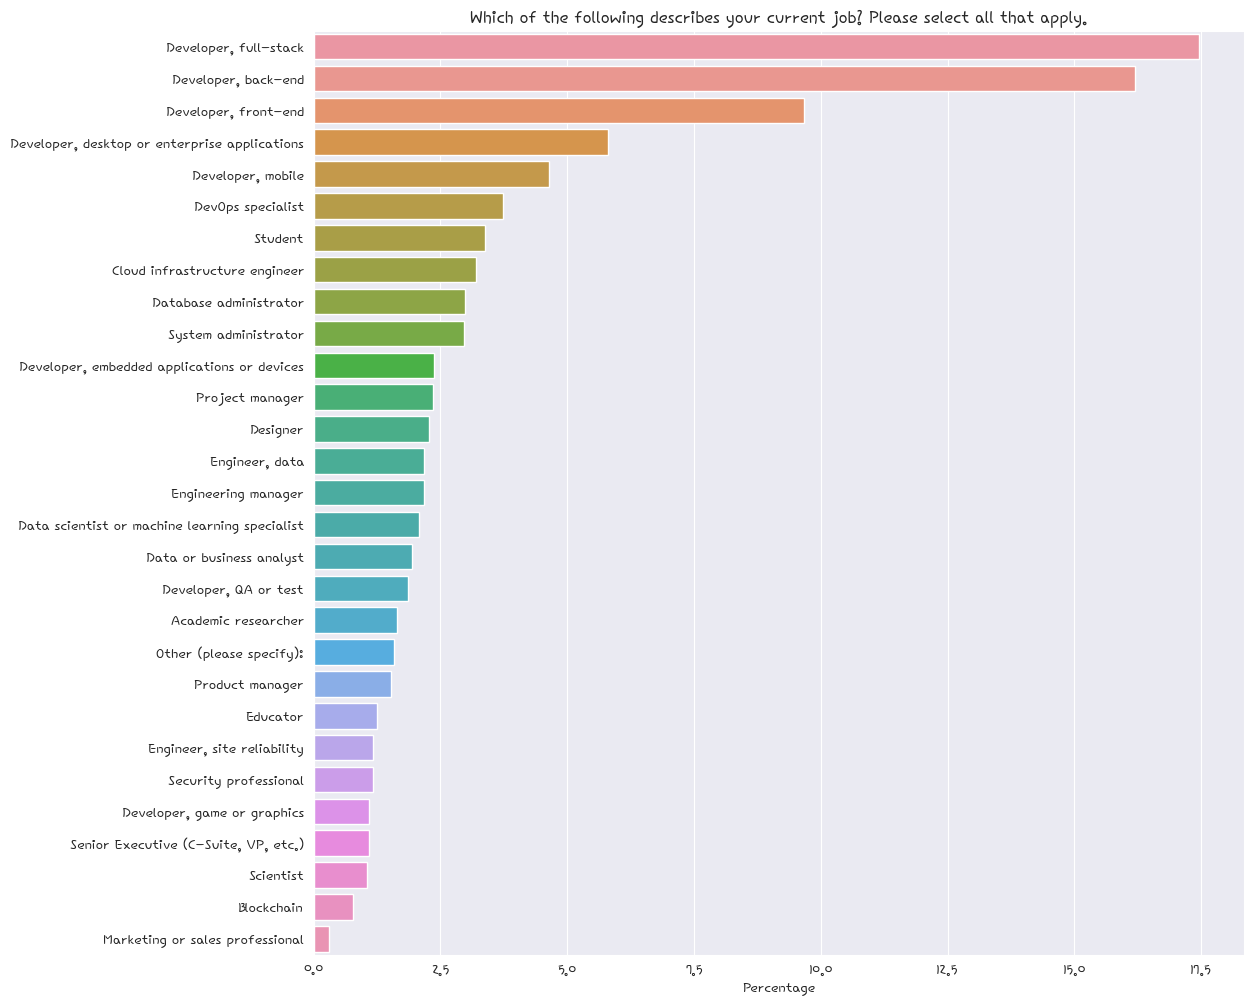

In [187]:
plt.figure(figsize=(12, 12))
plt.title(schema_raw["DevType"])
sns.barplot(x = devtype_percentage , y = devtype_percentage.index )
plt.xlabel("Percentage")
plt.show()

In [213]:
def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df
lan_type_df = split_multicolumn(survey_df['LanguageHaveWorkedWith'])
lan_type_df



,JavaScript,C#,C++,C,Delphi,Bash/Shell,Elixir,HTML/CSS,Python,VBA,Dart,MATLAB,Java,Haskell,Assembly,Groovy,Go,Swift,APL,Crystal,PHP,Clojure,Erlang,Rust,Ruby,Perl,Kotlin,TypeScript,SQL,Lua,COBOL,PowerShell,LISP,Scala,Objective-C,F#,Julia,Fortran,OCaml,R,Solidity,SAS
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [220]:
language_sum = lan_type_df.sum().sort_values(ascending=False) / lan_type_df.sum().sum() * 100
language_sum

JavaScript     12.656210
HTML/CSS       10.658759
SQL             9.576199
Python          9.298125
TypeScript      6.737094
Java            6.441124
Bash/Shell      5.604700
C#              5.416106
C++             4.360802
PHP             4.036199
C               3.718479
PowerShell      2.331690
Go              2.153833
Rust            1.784903
Kotlin          1.766457
Dart            1.264272
Ruby            1.163505
Assembly        1.045117
Swift           0.948204
R               0.897820
VBA             0.866434
MATLAB          0.789895
Lua             0.771448
Groovy          0.639294
Delphi          0.629658
Scala           0.495302
Objective-C     0.459235
Perl            0.443541
Haskell         0.421516
Elixir          0.412155
Julia           0.291564
Clojure         0.286884
Solidity        0.277523
LISP            0.247513
F#              0.196304
Fortran         0.173727
Erlang          0.170423
APL             0.130777
COBOL           0.122518
SAS             0.114809


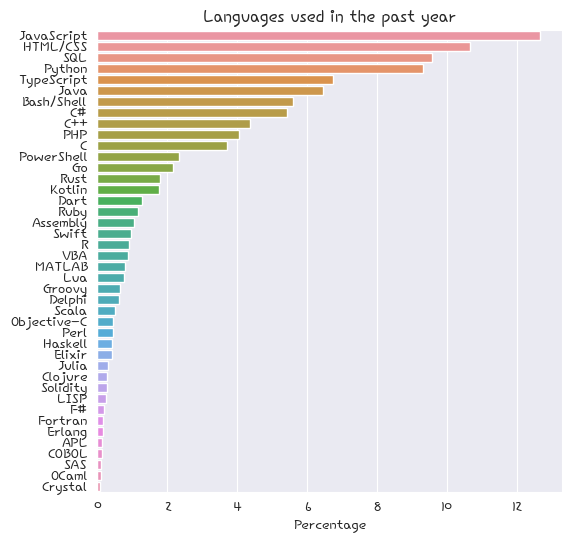

In [223]:
plt.figure(figsize=(6, 6))
plt.title("Languages used in the past year")
sns.barplot(x = language_sum , y = language_sum.index )
plt.xlabel("Percentage")
plt.show()

### 사는 곳이 한국인 응답자의 기술 스텝의 분포를 구하기  

In [264]:
home_country = survey_df[ (survey_df.Country == 'South Korea') | (survey_df.Country == 'Republic of Korea') ]
home_country 

def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df
home_type_df = split_multicolumn(home_country.LanguageHaveWorkedWith)
home_type_df

,Rust,Python,C++,Bash/Shell,C#,Haskell,HTML/CSS,JavaScript,Java,C,Assembly,Dart,Go,APL,Objective-C,Scala,Clojure,Elixir,TypeScript,Swift,Perl,Kotlin,MATLAB,Delphi,OCaml,SQL,R,SAS,Julia,PowerShell,PHP,Ruby,VBA,COBOL,LISP,Lua,Solidity,Crystal,Erlang,F#,Fortran,Groovy
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1289,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2933,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2991,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3024,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3161,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70985,False,True,True,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71427,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72114,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
home_country_per = home_type_df.sum().sort_values(ascending=False) / home_type_df.sum().sum() * 100
home_country_per

JavaScript     12.832765
Python         10.375427
HTML/CSS        9.351536
Java            8.532423
SQL             7.440273
TypeScript      6.894198
C++             5.938567
Bash/Shell      4.914676
C               4.914676
C#              4.232082
Kotlin          3.686007
Go              2.320819
PHP              2.25256
PowerShell      1.706485
Rust            1.638225
Swift           1.569966
Dart            1.228669
Assembly        1.023891
R               0.955631
Ruby            0.819113
MATLAB          0.750853
Objective-C     0.682594
Groovy          0.546075
Lua             0.546075
VBA             0.477816
Haskell         0.477816
Scala           0.477816
Elixir          0.477816
Julia           0.409556
Delphi          0.341297
OCaml           0.273038
Perl            0.273038
Solidity        0.273038
SAS             0.204778
Clojure         0.204778
LISP            0.204778
F#              0.204778
APL             0.136519
COBOL           0.136519
Erlang          0.136519


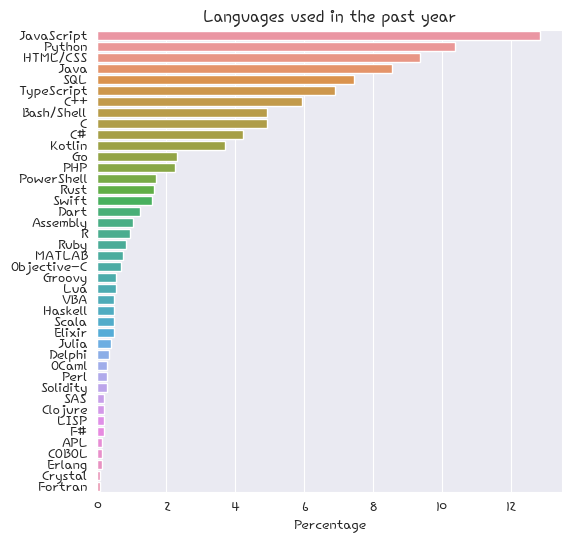

In [266]:
plt.figure(figsize=(6, 6))
plt.title("Languages used in the past year")
sns.barplot(x = home_country_per , y = home_country_per.index )
plt.xlabel("Percentage")
plt.show()

In [296]:
Data_lang = survey_df[survey_df.DevType.str.contains('Data scientist or machine learning specialist', na=False)]
Data_lang

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14.0,5.0,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
42,Israel,18-24 years old,Man,"Secondary school (e.g. American high school, G...",3.0,3.0,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;Python;SQL,Coursera;Udemy;Udacity,NaN,No,"Employed, full-time",Data scientist or machine learning specialist;...,3.0
51,Czech Republic,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11.0,NaN,Bash/Shell;Julia;Python,NaN,NaN,NaN,No,"Employed, full-time;Student, full-time",Data scientist or machine learning specialist;...,4.0
62,Mexico,25-34 years old,Man,Some college/university study without earning ...,2.0,NaN,Bash/Shell;HTML/CSS;Python,Assembly;Dart;Rust;Solidity;SQL,Coursera,NaN,Yes,"Student, part-time;Independent contractor, fre...",Data scientist or machine learning specialist;...,NaN
86,United States of America,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10.0,7.0,Bash/Shell;Java;Python;SQL,Clojure;Dart;Go;Java;JavaScript;Kotlin;Python;...,NaN,Developer portal or other central places to fi...,No,"Employed, full-time",Data scientist or machine learning specialist;...,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73197,Netherlands,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10.0,0.0,Bash/Shell;PowerShell;Python;SQL,Bash/Shell;Python;Rust;SQL,Coursera;Udemy;Codecademy,Developer portal or other central places to fi...,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
73230,United States of America,45-54 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",18.0,15.0,Bash/Shell;C++;PowerShell;Python;SQL,C++;Python,NaN,None of these,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,15.0
73235,Thailand,25-34 years old,Man,NaN,3.0,4.0,Assembly;Bash/Shell;JavaScript;PHP;Python;R;SA...,APL;C;C#;C++,Coursera;Udemy;edX;Skillsoft,DevOps function,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,20.0


In [297]:
Dev_type_df = split_multicolumn(Data_lang.LanguageHaveWorkedWith)
Dev_type_df

,C#,Bash/Shell,Python,C++,C,HTML/CSS,Go,Assembly,Haskell,Groovy,JavaScript,APL,Elixir,Dart,F#,LISP,Clojure,Erlang,Rust,Julia,PowerShell,MATLAB,Java,Delphi,R,COBOL,PHP,Fortran,Perl,VBA,Kotlin,Crystal,Objective-C,SQL,Lua,TypeScript,Scala,SAS,OCaml,Swift,Solidity,Ruby
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,True,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73197,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73230,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73235,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,NaN,NaN,True,NaN,NaN,NaN,NaN


In [298]:
Dev_country_per = Dev_type_df.sum().sort_values(ascending=False) /Dev_type_df.sum().sum() * 100
Dev_country_per

Python         15.694133
SQL            10.387945
JavaScript      8.079513
HTML/CSS        7.267287
Bash/Shell      6.668804
C++             5.231378
R               4.884044
Java            4.526023
C               3.900823
TypeScript      3.345089
C#              3.088597
PHP              2.40996
PowerShell      2.308432
MATLAB          2.132094
Go              1.886288
Rust            1.779416
Julia           1.341242
VBA             1.212996
Kotlin          1.196965
Scala           1.116811
Assembly        1.090093
Ruby            0.876349
Dart            0.854975
Swift           0.732072
Lua             0.726729
Perl            0.710698
SAS             0.646575
Haskell          0.60917
Groovy          0.555734
Delphi          0.534359
Fortran         0.512985
LISP            0.512985
Solidity        0.448862
Objective-C     0.443518
Clojure         0.427487
Elixir          0.374052
Erlang          0.277867
F#              0.277867
APL             0.261836
OCaml           0.245805


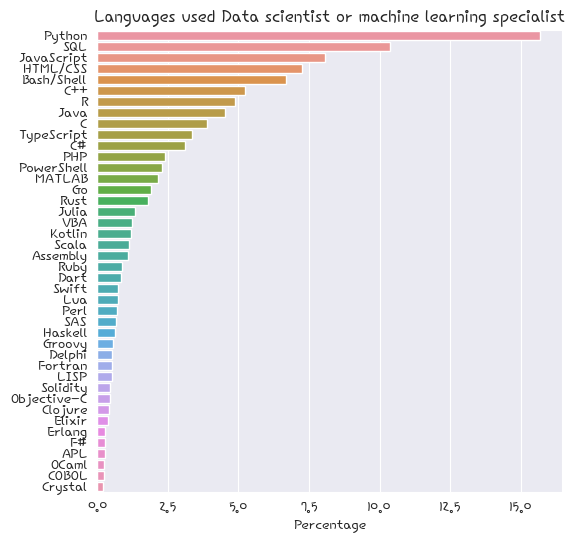

In [302]:
plt.figure(figsize=(6, 6))
plt.title("Languages used Data scientist or machine learning specialist")
sns.barplot(x = Dev_country_per , y = Dev_country_per.index )
plt.xlabel("Percentage")
plt.show()

In [318]:
survey_df.LanguageWantToWorkWith

ResponseId
1                                                   NaN
2                                       Rust;TypeScript
3                 C#;C++;HTML/CSS;JavaScript;TypeScript
4                                     C#;SQL;TypeScript
5            C#;Elixir;F#;Go;JavaScript;Rust;TypeScript
                              ...                      
73264    Bash/Shell;Go;JavaScript;Python;SQL;TypeScript
73265                        HTML/CSS;JavaScript;Python
73266             C#;HTML/CSS;JavaScript;PHP;Python;SQL
73267                                            Delphi
73268                        PowerShell;Rust;TypeScript
Name: LanguageWantToWorkWith, Length: 73268, dtype: object

In [319]:
language_fa_type = split_multicolumn(survey_df.LanguageWantToWorkWith)
language_fa_type

,Rust,C#,Lua,C,APL,Delphi,C++,Haskell,Elixir,HTML/CSS,Bash/Shell,JavaScript,Python,SQL,TypeScript,Go,Dart,Clojure,Assembly,Java,Swift,Kotlin,Crystal,Groovy,F#,LISP,Julia,Ruby,PHP,Perl,Erlang,COBOL,Scala,PowerShell,Fortran,OCaml,MATLAB,R,Objective-C,Solidity,SAS,VBA
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,True,True,False,False,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,True,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [320]:
language_fa_per = language_fa_type.sum().sort_values(ascending=False) /language_fa_type.sum().sum() * 100
language_fa_per

JavaScript     10.339908
Python          9.614277
TypeScript      8.536424
HTML/CSS        8.318933
SQL             8.136532
Rust            5.576963
C#              5.135692
Go              5.082726
Java            4.372323
Bash/Shell      4.320019
C++             3.888348
Kotlin          3.050496
C               2.558577
PHP             2.398024
Dart            1.995485
Swift           1.658490
PowerShell      1.537993
Ruby            1.269523
Elixir          1.074874
Assembly        0.980197
Haskell         0.954377
R               0.953384
Solidity        0.853411
Scala           0.797797
Lua             0.773631
Julia           0.719672
F#              0.629299
Clojure         0.627644
Delphi          0.543892
Erlang          0.396250
LISP            0.393602
MATLAB          0.341960
Groovy          0.336001
Perl            0.300250
VBA             0.297932
Objective-C     0.283698
OCaml           0.235036
APL             0.188359
Crystal         0.161546
Fortran         0.138704


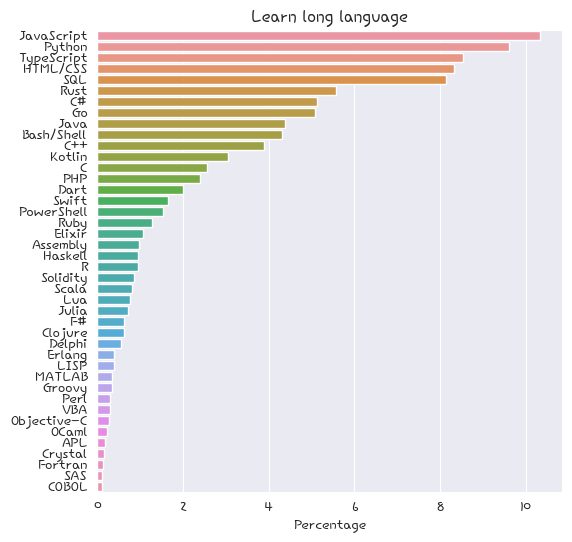

In [321]:
plt.figure(figsize=(6, 6))
plt.title("Learn long language")
sns.barplot(x = language_fa_per , y = language_fa_per.index )
plt.xlabel("Percentage")
plt.show()

In [322]:
survey_raw_df.DatabaseHaveWorkedWith

ResponseId
1                                                      NaN
2                                                      NaN
3                                     Microsoft SQL Server
4                                     Microsoft SQL Server
5        Cloud Firestore;Elasticsearch;Microsoft SQL Se...
                               ...                        
73264                 Elasticsearch;MySQL;PostgreSQL;Redis
73265                  Elasticsearch;MongoDB;Oracle;SQLite
73266    MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...
73267                  Microsoft SQL Server;MongoDB;Oracle
73268                     Microsoft SQL Server;Neo4j;Redis
Name: DatabaseHaveWorkedWith, Length: 73268, dtype: object

In [324]:
language_data_type = split_multicolumn(survey_raw_df.DatabaseHaveWorkedWith)
language_data_type

,Microsoft SQL Server,Cloud Firestore,MongoDB,Couchbase,PostgreSQL,DynamoDB,Elasticsearch,Cassandra,MySQL,MariaDB,SQLite,IBM DB2,CouchDB,Oracle,Neo4j,Firebase Realtime Database,Redis
ResponseId,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True
73265,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False
73266,True,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False,False


In [325]:
language_data_per = language_data_type.sum().sort_values(ascending=False) /language_data_type.sum().sum() * 100
language_data_per

MySQL                         17.024325
PostgreSQL                    15.841218
SQLite                        11.632294
MongoDB                       10.283838
Microsoft SQL Server           9.762722
Redis                          8.041188
MariaDB                        6.513655
Elasticsearch                  4.435159
Oracle                         4.174899
Firebase Realtime Database     3.169079
DynamoDB                       3.001940
Cloud Firestore                2.707059
Cassandra                      0.965229
Neo4j                          0.770631
IBM DB2                        0.727653
Couchbase                      0.481719
CouchDB                        0.467393
dtype: float64

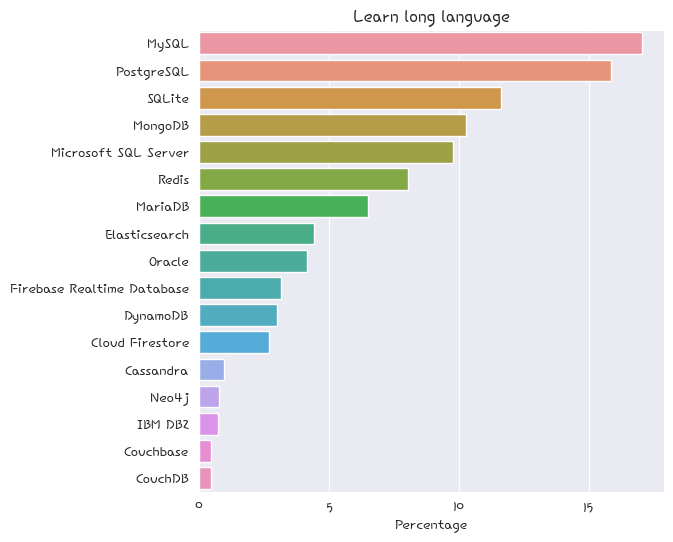

In [326]:
plt.figure(figsize=(6, 6))
plt.title("Learn long language")
sns.barplot(x = language_data_per, y = language_data_per.index )
plt.xlabel("Percentage")
plt.show()